# Heat equation tutorial

This is a simple tutorial to introduce you to using bice. We will define the heat equation and
perform a time simulation of it.

First, let's import the packages that we will need

In [237]:
import sys  # noqa

from IPython.display import display

sys.path.append("../..")  # noqa
import matplotlib.pyplot as plt
import numpy as np

import bice
from bice.pde.finite_differences import *

%matplotlib inline

Now, we can define the equation, namely the 1d Heat equation:
  du/dt = -k d²u/dx²
with some coefficient k.

In [238]:
class HeatEquation(FiniteDifferencesEquation):
    def __init__(self, N, L):
        super().__init__()
        # parameters
        self.k = 1
        # spatial coordinate
        self.x = [np.linspace(-L / 2, L / 2, N)]
        # initial condition
        self.u = np.cos(2 * np.pi * self.x[0] / 10) * np.exp(-0.005 * self.x[0] ** 2)
        # boundary conditions
        self.bc = PeriodicBC()
        # build finite difference matrices
        self.build_FD_matrices()

    # definition of the equation (right-hand side)
    def rhs(self, u):
        return self.k * self.laplace(u)

A mathematical problem may consist of more than one equation. Hence, we need to set up a Problem and add the equation to it:

In [239]:
# create a problem
problem = bice.Problem()
# create instance of the heat equation
heat_eq = HeatEquation(N=256, L=100)
# add the equation to the problem
problem.add_equation(heat_eq)

Let's visualize the initial condition:

(-1.0, 1.0)

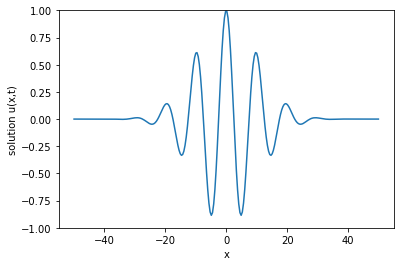

In [240]:
fig, ax = plt.subplots()
heat_eq.plot(ax)
ax.set_ylim((-1, 1))

Now let's perform a time simulation of the equation and plot the solution again.

Step #0
Step #1
Step #2
Step #3
Step #4


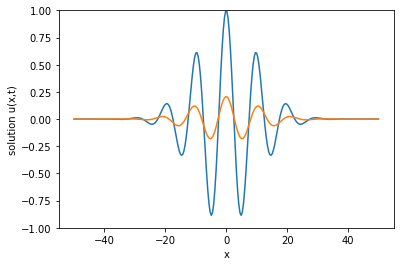

In [241]:
# Set the time stepping scheme
problem.time_stepper = bice.time_steppers.ImplicitEuler(dt=1)

# Perform some steps
for n in range(5):
    problem.time_step()
    print(f"Step #{n}")

# Plot the solution
heat_eq.plot(ax)
display(fig)

We see that the solution has decayed, as expected from the heat equation.